In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm

### (a)
I think treating missing value as an explicit category is a resonable approach. 1:The important info won't be dicarded.2: Data size won't reduce. We need the data size to ensure our model is useful.3: missing value may be useful later on during the analysis. Thus this modeling approach is resonable.

In [2]:
#read the data
yelp_train=pd.read_csv("yelp242a_train.csv")
yelp_test=pd.read_csv("yelp242a_test.csv")
yelp_train.head()

stars  review_count GoodForKids          Alcohol  \
0    4.0             9        TRUE       'full_bar'   
1    3.5            12        TRUE        (Missing)   
2    3.0             6   (Missing)        (Missing)   
3    4.0          1388        TRUE       'full_bar'   
4    3.0            77        TRUE  'beer_and_wine'   

  BusinessAcceptsCreditCards       WiFi BikeParking ByAppointmentOnly  \
0                       TRUE  (Missing)   (Missing)         (Missing)   
1                       TRUE  (Missing)        TRUE         (Missing)   
2                       TRUE  (Missing)   (Missing)         (Missing)   
3                       TRUE     'free'        TRUE             FALSE   
4                       TRUE       'no'       FALSE         (Missing)   

  WheelechairAccessible OutdoorSeating RestaurantsReservations DogsAllowed  \
0             (Missing)          FALSE                   FALSE   (Missing)   
1                  TRUE      (Missing)               (Missing)   (Missing)   
2             (Missing)      (Missing)               (Missing)   (Missing)   
3             (Missing)           TRUE                    TRUE       FALSE   
4             (Missing)           TRUE                    TRUE   (Missing)   

      Caters  
0  (Missing)  
1  (Missing)  
2  (Missing)  
3       TRUE  
4  (Missing)

In [3]:
#Now we perform a linear regression model
#(b)(i)
import statsmodels.formula.api as smf
ols = smf.ols(formula="stars ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", 
              data=yelp_train)

model1 =ols.fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.56
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.30e-218
Time:                        11:37:06   Log-Likelihood:                -7295.9
No. Observations:                6272   AIC:                         1.464e+04
Df Residuals:                    6246   BIC:                         1.482e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [4]:
#(b)(ii)
yelp_enc = pd.get_dummies(yelp_train, drop_first=True)
yelp_enc.head(40)


stars  review_count  GoodForKids_FALSE  GoodForKids_TRUE  \
0     4.0             9                  0                 1   
1     3.5            12                  0                 1   
2     3.0             6                  0                 0   
3     4.0          1388                  0                 1   
4     3.0            77                  0                 1   
5     2.5            10                  0                 1   
6     3.0            27                  0                 1   
7     4.5           144                  0                 1   
8     4.0           429                  1                 0   
9     3.0            26                  0                 1   
10    3.5           478                  0                 1   
11    3.5            85                  0                 1   
12    2.5             9                  0                 0   
13    4.0            92                  0                 1   
14    4.5            12                  0                 0   
15    4.0            25                  0                 0   
16    4.5            29                  0                 1   
17    4.5            16                  0                 1   
18    2.0            72                  0                 1   
19    3.5            36                  0                 0   
20    4.5            42                  0                 1   
21    5.0            59                  0                 1   
22    4.0             8                  0                 1   
23    4.0           538                  1                 0   
24    4.0             3                  0                 0   
25    3.5           261                  0                 1   
26    4.0            37                  0                 1   
27    3.5             3                  0                 1   
28    4.0           342                  0                 1   
29    3.5           122                  0                 1   
30    4.0            20                  0                 1   
31    5.0             7                  0                 0   
32    3.5            19                  0                 0   
33    2.0            64                  0                 1   
34    4.0            25                  0                 0   
35    3.5           259                  0                 1   
36    2.5            50                  0                 0   
37    3.5            19                  1                 0   
38    4.5            47                  0                 1   
39    4.0           168                  1                 0   

    Alcohol_'full_bar'  Alcohol_'none'  Alcohol_(Missing)  \
0                    1               0                  0   
1                    0               0                  1   
2                    0               0                  1   
3                    1               0                  0   
4                    0               0                  0   
5                    0               0                  1   
6                    0               1                  0   
7                    0               0                  0   
8                    1               0                  0   
9                    0               1                  0   
10                   1               0                  0   
11                   0               1                  0   
12                   0               0                  1   
13                   0               0                  1   
14                   0               0                  1   
15                   0               0                  1   
16                   0               0                  1   
17                   0               1                  0   
18                   0               1                  0   
19                   0               0                  1   
20                   0               1                  0   
21                   0               

In [5]:
#(b)(ii)
y_train = yelp_enc['stars']
X_train = yelp_enc.drop(['stars'], axis=1)
X_train.shape



(6272, 25)

Now we perform Cross-Validation to get a good cp used for regression tree.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, 
### we get the same split.
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

In [7]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0009800000000000002}


Node count = 67


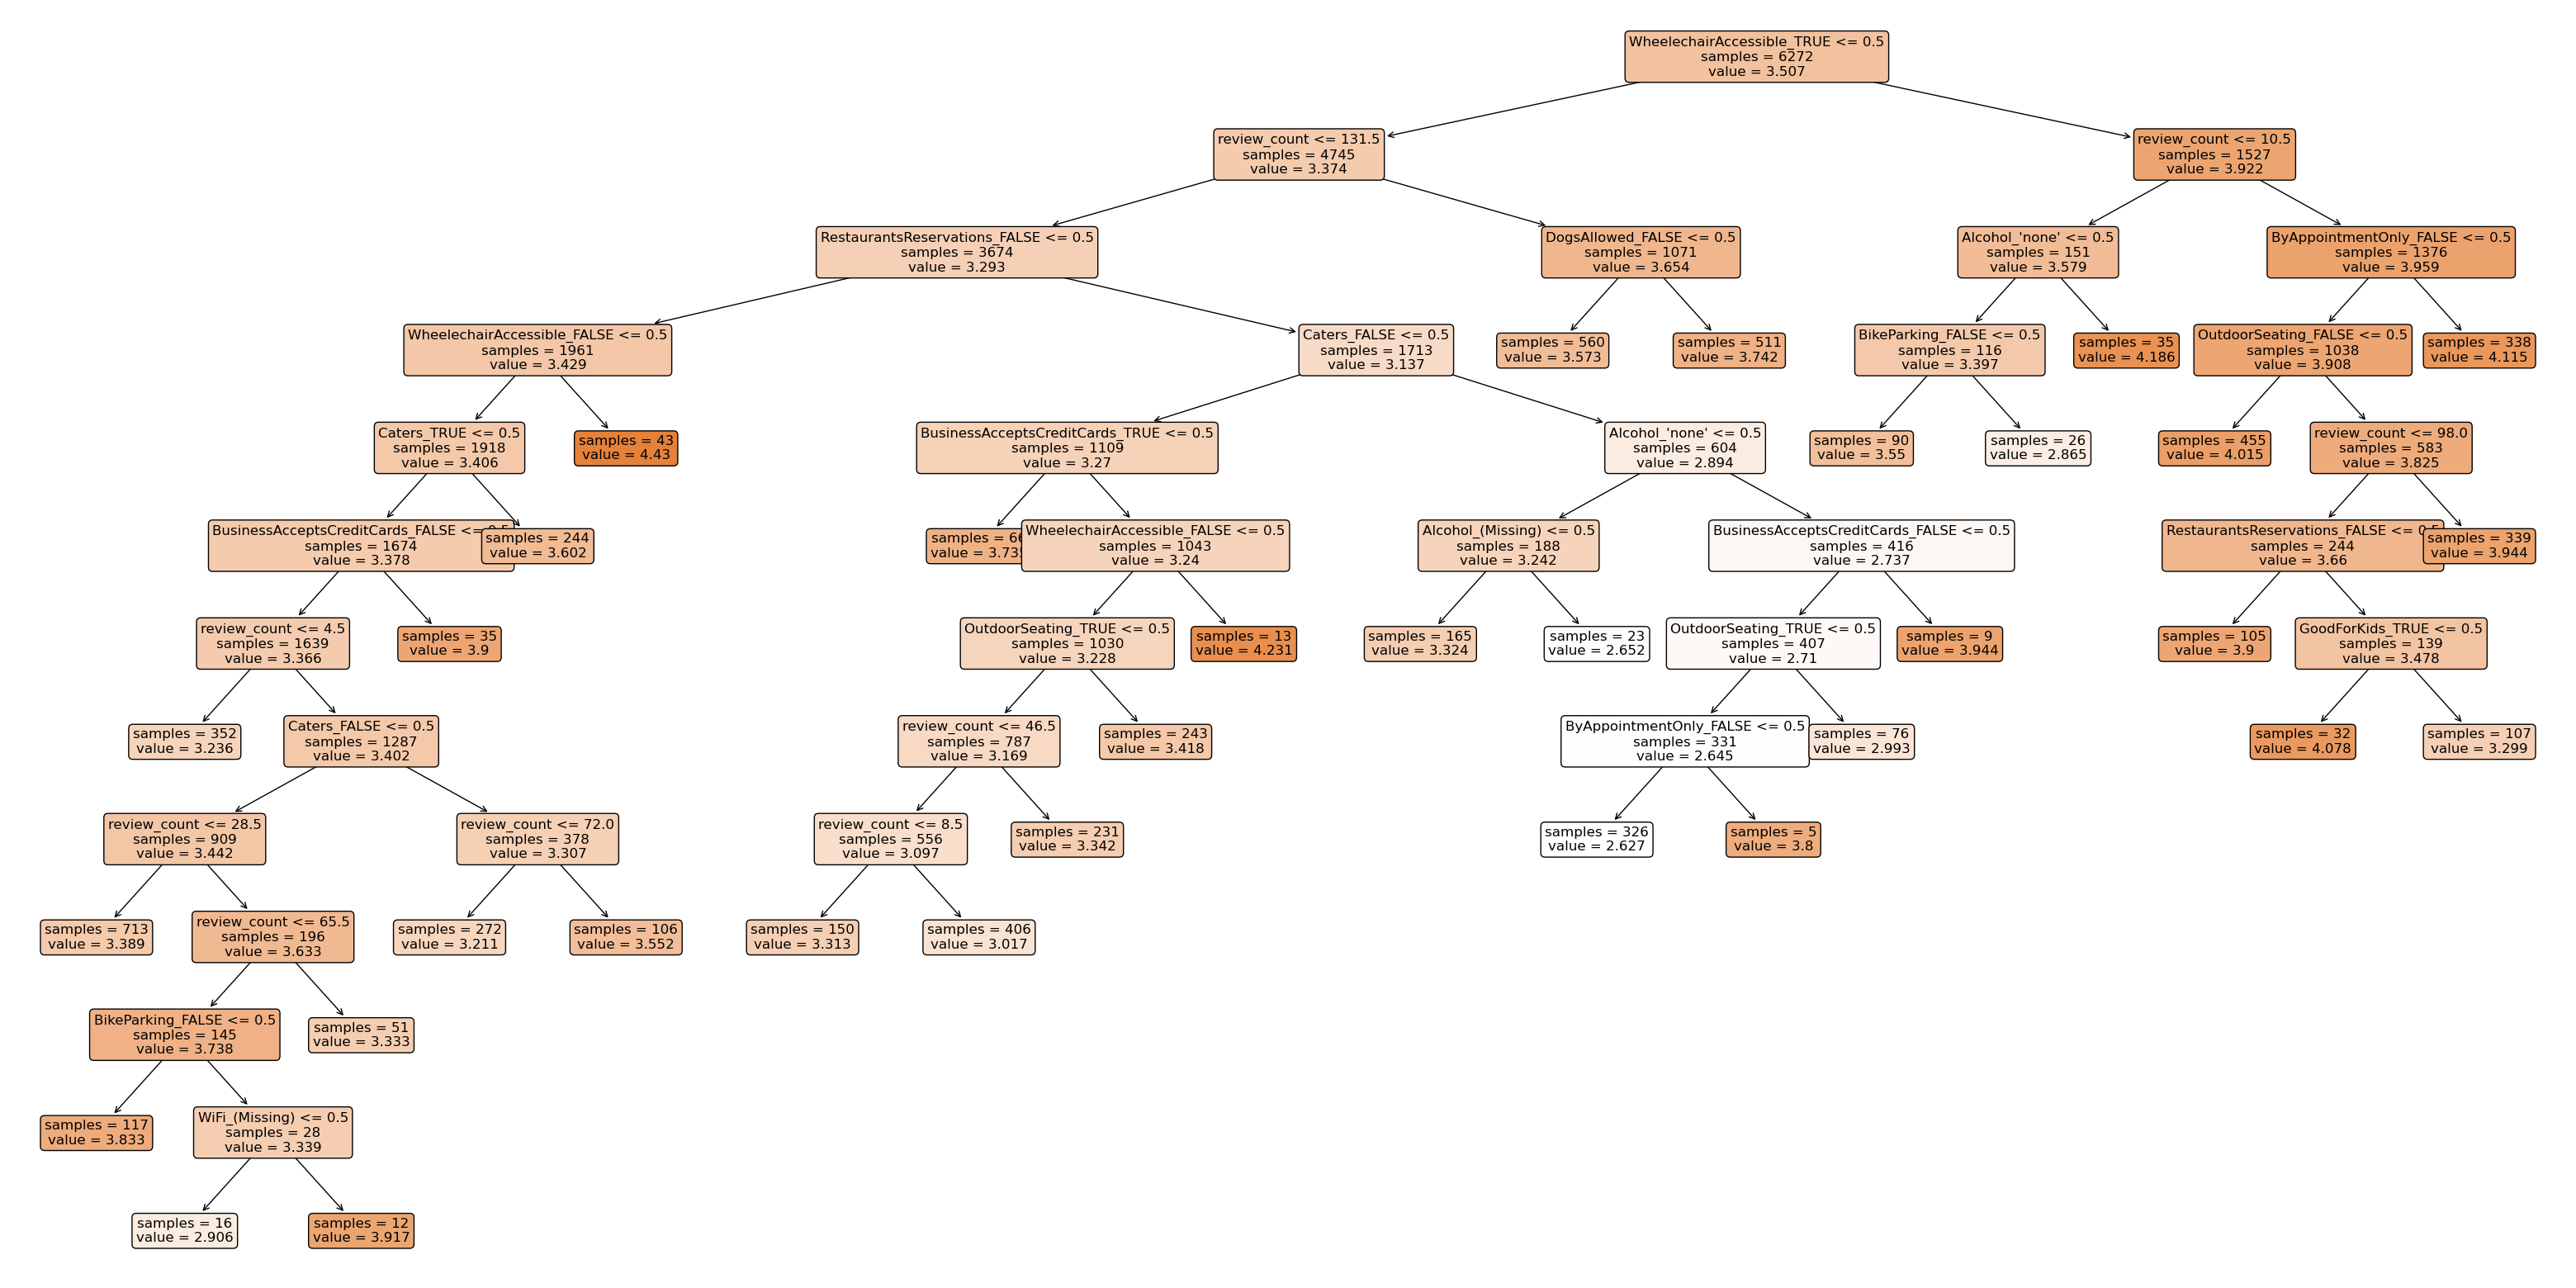

In [9]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.00098,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(40,20))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

### define OSR square 

In [12]:
def OSR2(model, x_test, y_test, y_train):
    
    y_pred = model.predict(x_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

yelp_tenc = pd.get_dummies(yelp_test, drop_first=True)
y_test = yelp_tenc['stars']
x_test = yelp_tenc.drop(['stars'],axis=1)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### calculate OSR 2 and MAE

In [16]:
#(b)(iii)
comparison_data = {'Linear Regression': ['{:.3f}'.format(OSR2(lr, x_test, y_test, y_train)),
                                         '{:.4f}'.format(mean_squared_error(y_test, lr.predict(x_test))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, lr.predict(x_test)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(OSR2(dtr_cv, x_test, y_test, y_train)),
                                               '{:.4f}'.format(mean_squared_error(y_test, dtr_cv.predict(x_test))),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(x_test)))]}
                   

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample MSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])


### regression tree overall performs slightly better than the linear Regression model. It has a higher OSR2 and a lower MSE. Since the OSR2 is low on both models,which indicates that neither the model is well-performed on the data.

#### set a treshold value 4, and set the new column.

In [24]:
#(c)
threshold = 4  
yelp_train['fourOrAbove'] = (yelp_train['stars'] >= threshold).astype(int)
yelp_test['fourOrAbove'] = (yelp_test['stars'] >= threshold).astype(int)


In [21]:
yelp_train.head()

stars  review_count GoodForKids          Alcohol  \
0    4.0             9        TRUE       'full_bar'   
1    3.5            12        TRUE        (Missing)   
2    3.0             6   (Missing)        (Missing)   
3    4.0          1388        TRUE       'full_bar'   
4    3.0            77        TRUE  'beer_and_wine'   

  BusinessAcceptsCreditCards       WiFi BikeParking ByAppointmentOnly  \
0                       TRUE  (Missing)   (Missing)         (Missing)   
1                       TRUE  (Missing)        TRUE         (Missing)   
2                       TRUE  (Missing)   (Missing)         (Missing)   
3                       TRUE     'free'        TRUE             FALSE   
4                       TRUE       'no'       FALSE         (Missing)   

  WheelechairAccessible OutdoorSeating RestaurantsReservations DogsAllowed  \
0             (Missing)          FALSE                   FALSE   (Missing)   
1                  TRUE      (Missing)               (Missing)   (Missing)   
2             (Missing)      (Missing)               (Missing)   (Missing)   
3             (Missing)           TRUE                    TRUE       FALSE   
4             (Missing)           TRUE                    TRUE   (Missing)   

      Caters  fourOrAbove  
0  (Missing)            1  
1  (Missing)            0  
2  (Missing)            0  
3       TRUE            1  
4  (Missing)            0

In [22]:
yelp_test.head()

stars  review_count GoodForKids          Alcohol  \
0    2.5            56   (Missing)           'none'   
1    4.0           120        TRUE           'none'   
2    4.0           269        TRUE  'beer_and_wine'   
3    2.5            29        TRUE           'none'   
4    3.5           660        TRUE       'full_bar'   

  BusinessAcceptsCreditCards    WiFi BikeParking ByAppointmentOnly  \
0                       TRUE  'free'       FALSE         (Missing)   
1                       TRUE    'no'        TRUE         (Missing)   
2                       TRUE    'no'        TRUE         (Missing)   
3                       TRUE    'no'        TRUE         (Missing)   
4                       TRUE  'free'       FALSE              TRUE   

  WheelechairAccessible OutdoorSeating RestaurantsReservations DogsAllowed  \
0             (Missing)          FALSE               (Missing)   (Missing)   
1                  TRUE          FALSE                   FALSE       FALSE   
2             (Missing)          FALSE                   FALSE   (Missing)   
3             (Missing)          FALSE                   FALSE   (Missing)   
4                  TRUE          FALSE                    TRUE       FALSE   

      Caters  fourOrAbove  
0      FALSE            0  
1       TRUE            1  
2      FALSE            1  
3  (Missing)            0  
4      FALSE            0

In [30]:
#(d)(i)
class_distribution = yelp_train['fourOrAbove'].value_counts(normalize=True) * 100
print(class_distribution)

0    55.660077
1    44.339923
Name: fourOrAbove, dtype: float64


### we can see the distribution for '0' and '1' are fairly balanced. Thus weigh false positives and false negatives equally will help not create a huge bias on the other class. Acuuracy then is fair to be used as the primary performance metric since the model will not always predict the majority class.

In [25]:
#(d)(ii)
import statsmodels.formula.api as smf
ols = smf.ols(formula="fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", 
              data=yelp_train)

model2 =ols.fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            fourOrAbove   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     40.88
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          5.26e-184
Time:                        16:38:53   Log-Likelihood:                -4036.4
No. Observations:                6272   AIC:                             8125.
Df Residuals:                    6246   BIC:                             8300.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [44]:
yelp_enc1 = pd.get_dummies(yelp_train, drop_first=True)
yelp_enc1.head(40)



stars  review_count  fourOrAbove  GoodForKids_FALSE  GoodForKids_TRUE  \
0     4.0             9            1                  0                 1   
1     3.5            12            0                  0                 1   
2     3.0             6            0                  0                 0   
3     4.0          1388            1                  0                 1   
4     3.0            77            0                  0                 1   
5     2.5            10            0                  0                 1   
6     3.0            27            0                  0                 1   
7     4.5           144            1                  0                 1   
8     4.0           429            1                  1                 0   
9     3.0            26            0                  0                 1   
10    3.5           478            0                  0                 1   
11    3.5            85            0                  0                 1   
12    2.5             9            0                  0                 0   
13    4.0            92            1                  0                 1   
14    4.5            12            1                  0                 0   
15    4.0            25            1                  0                 0   
16    4.5            29            1                  0                 1   
17    4.5            16            1                  0                 1   
18    2.0            72            0                  0                 1   
19    3.5            36            0                  0                 0   
20    4.5            42            1                  0                 1   
21    5.0            59            1                  0                 1   
22    4.0             8            1                  0                 1   
23    4.0           538            1                  1                 0   
24    4.0             3            1                  0                 0   
25    3.5           261            0                  0                 1   
26    4.0            37            1                  0                 1   
27    3.5             3            0                  0                 1   
28    4.0           342            1                  0                 1   
29    3.5           122            0                  0                 1   
30    4.0            20            1                  0                 1   
31    5.0             7            1                  0                 0   
32    3.5            19            0                  0                 0   
33    2.0            64            0                  0                 1   
34    4.0            25            1                  0                 0   
35    3.5           259            0                  0                 1   
36    2.5            50            0                  0                 0   
37    3.5            19            0                  1                 0   
38    4.5            47            1                  0                 1   
39    4.0           168            1                  1                 0   

    Alcohol_'full_bar'  Alcohol_'none'  Alcohol_(Missing)  \
0                    1               0                  0   
1                    0               0                  1   
2                    0               0                  1   
3                    1               0                  0   
4                    0               0                  0   
5                    0               0                  1   
6                    0               1                  0   
7                    0               0                  0   
8                    1               0                  0   
9                    0               1                  0   
10                   1               0                  0   
11                   0               1                  0   
12                   0               0               

In [98]:
y_train1 = yelp_enc1['fourOrAbove']
X_train1 = yelp_enc1.drop(['fourOrAbove','stars'], axis=1)
X_train1.shape

(6272, 25)

In [58]:
#now we do cross validation for a new better ccp_alpha
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)


cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train1, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

In [59]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.00044}


Node count = 51


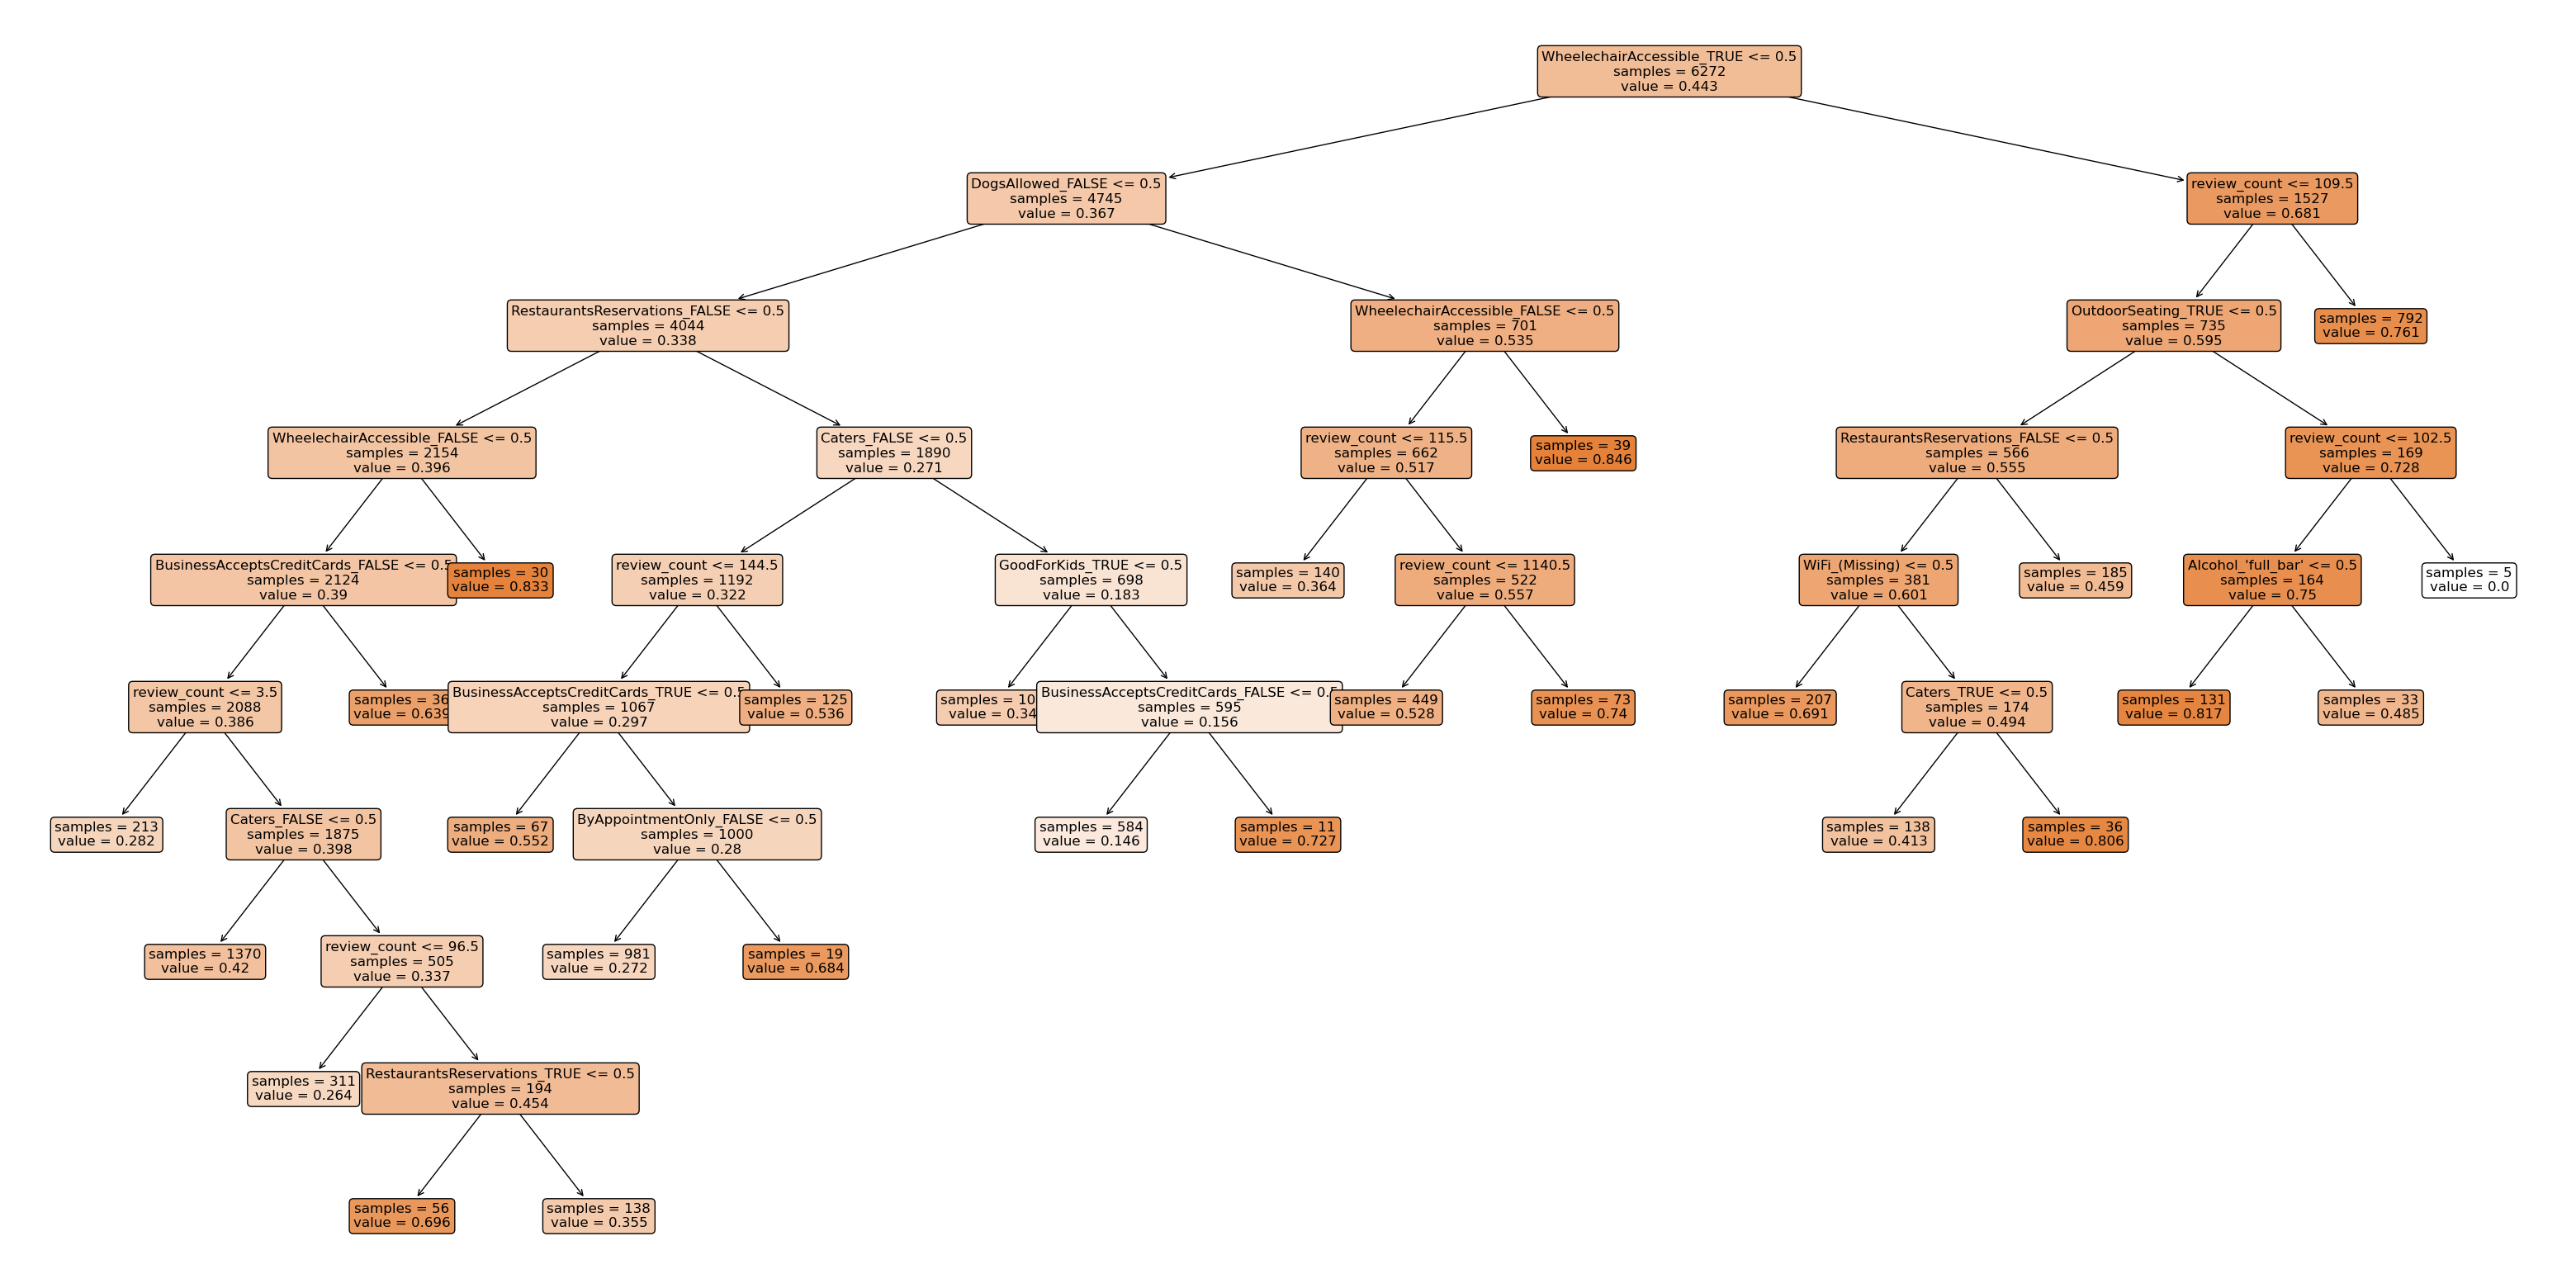

In [99]:
#apply it on regression  tree
dtr1 = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.00044,
                            random_state = 88)
dtr1 = dtr.fit(X_train1, y_train1)
print('Node count =', dtr1.tree_.node_count)
plt.figure(figsize=(40,20))
plot_tree(dtr1, 
          feature_names=X_train1.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [31]:
#(d)(iii) fit the logistic regression model
model3 = smf.logit(formula="fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", 
              data=yelp_train).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.612512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.1081
Time:                        16:53:20   Log-Likelihood:                -3841.7
converged:                       True   LL-Null:                       -4307.1
Covariance Type:            nonrobust   LLR p-value:                2.537e-180
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [52]:
#(d)(iv)
#cross -validation
from sklearn.tree import DecisionTreeClassifier
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train1, y_train1)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='acc

In [53]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

ccp alpha  Validation Accuracy
0        0.0             0.504464
1     0.0005             0.443399
2      0.001             0.443399
3     0.0015             0.443399
4      0.002             0.443399
5     0.0025             0.443399
6      0.003             0.443399
7     0.0035             0.443399
8      0.004             0.443399
9     0.0045             0.443399
10     0.005             0.443399
11    0.0055             0.443399
12     0.006             0.443399
13    0.0065             0.443399
14     0.007             0.443399
15    0.0075             0.443399
16     0.008             0.443399
17    0.0085             0.443399
18     0.009             0.443399
19    0.0095             0.443399

In [54]:
#find the best ccp_alpha
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.5044636780137954


Node count = 1673


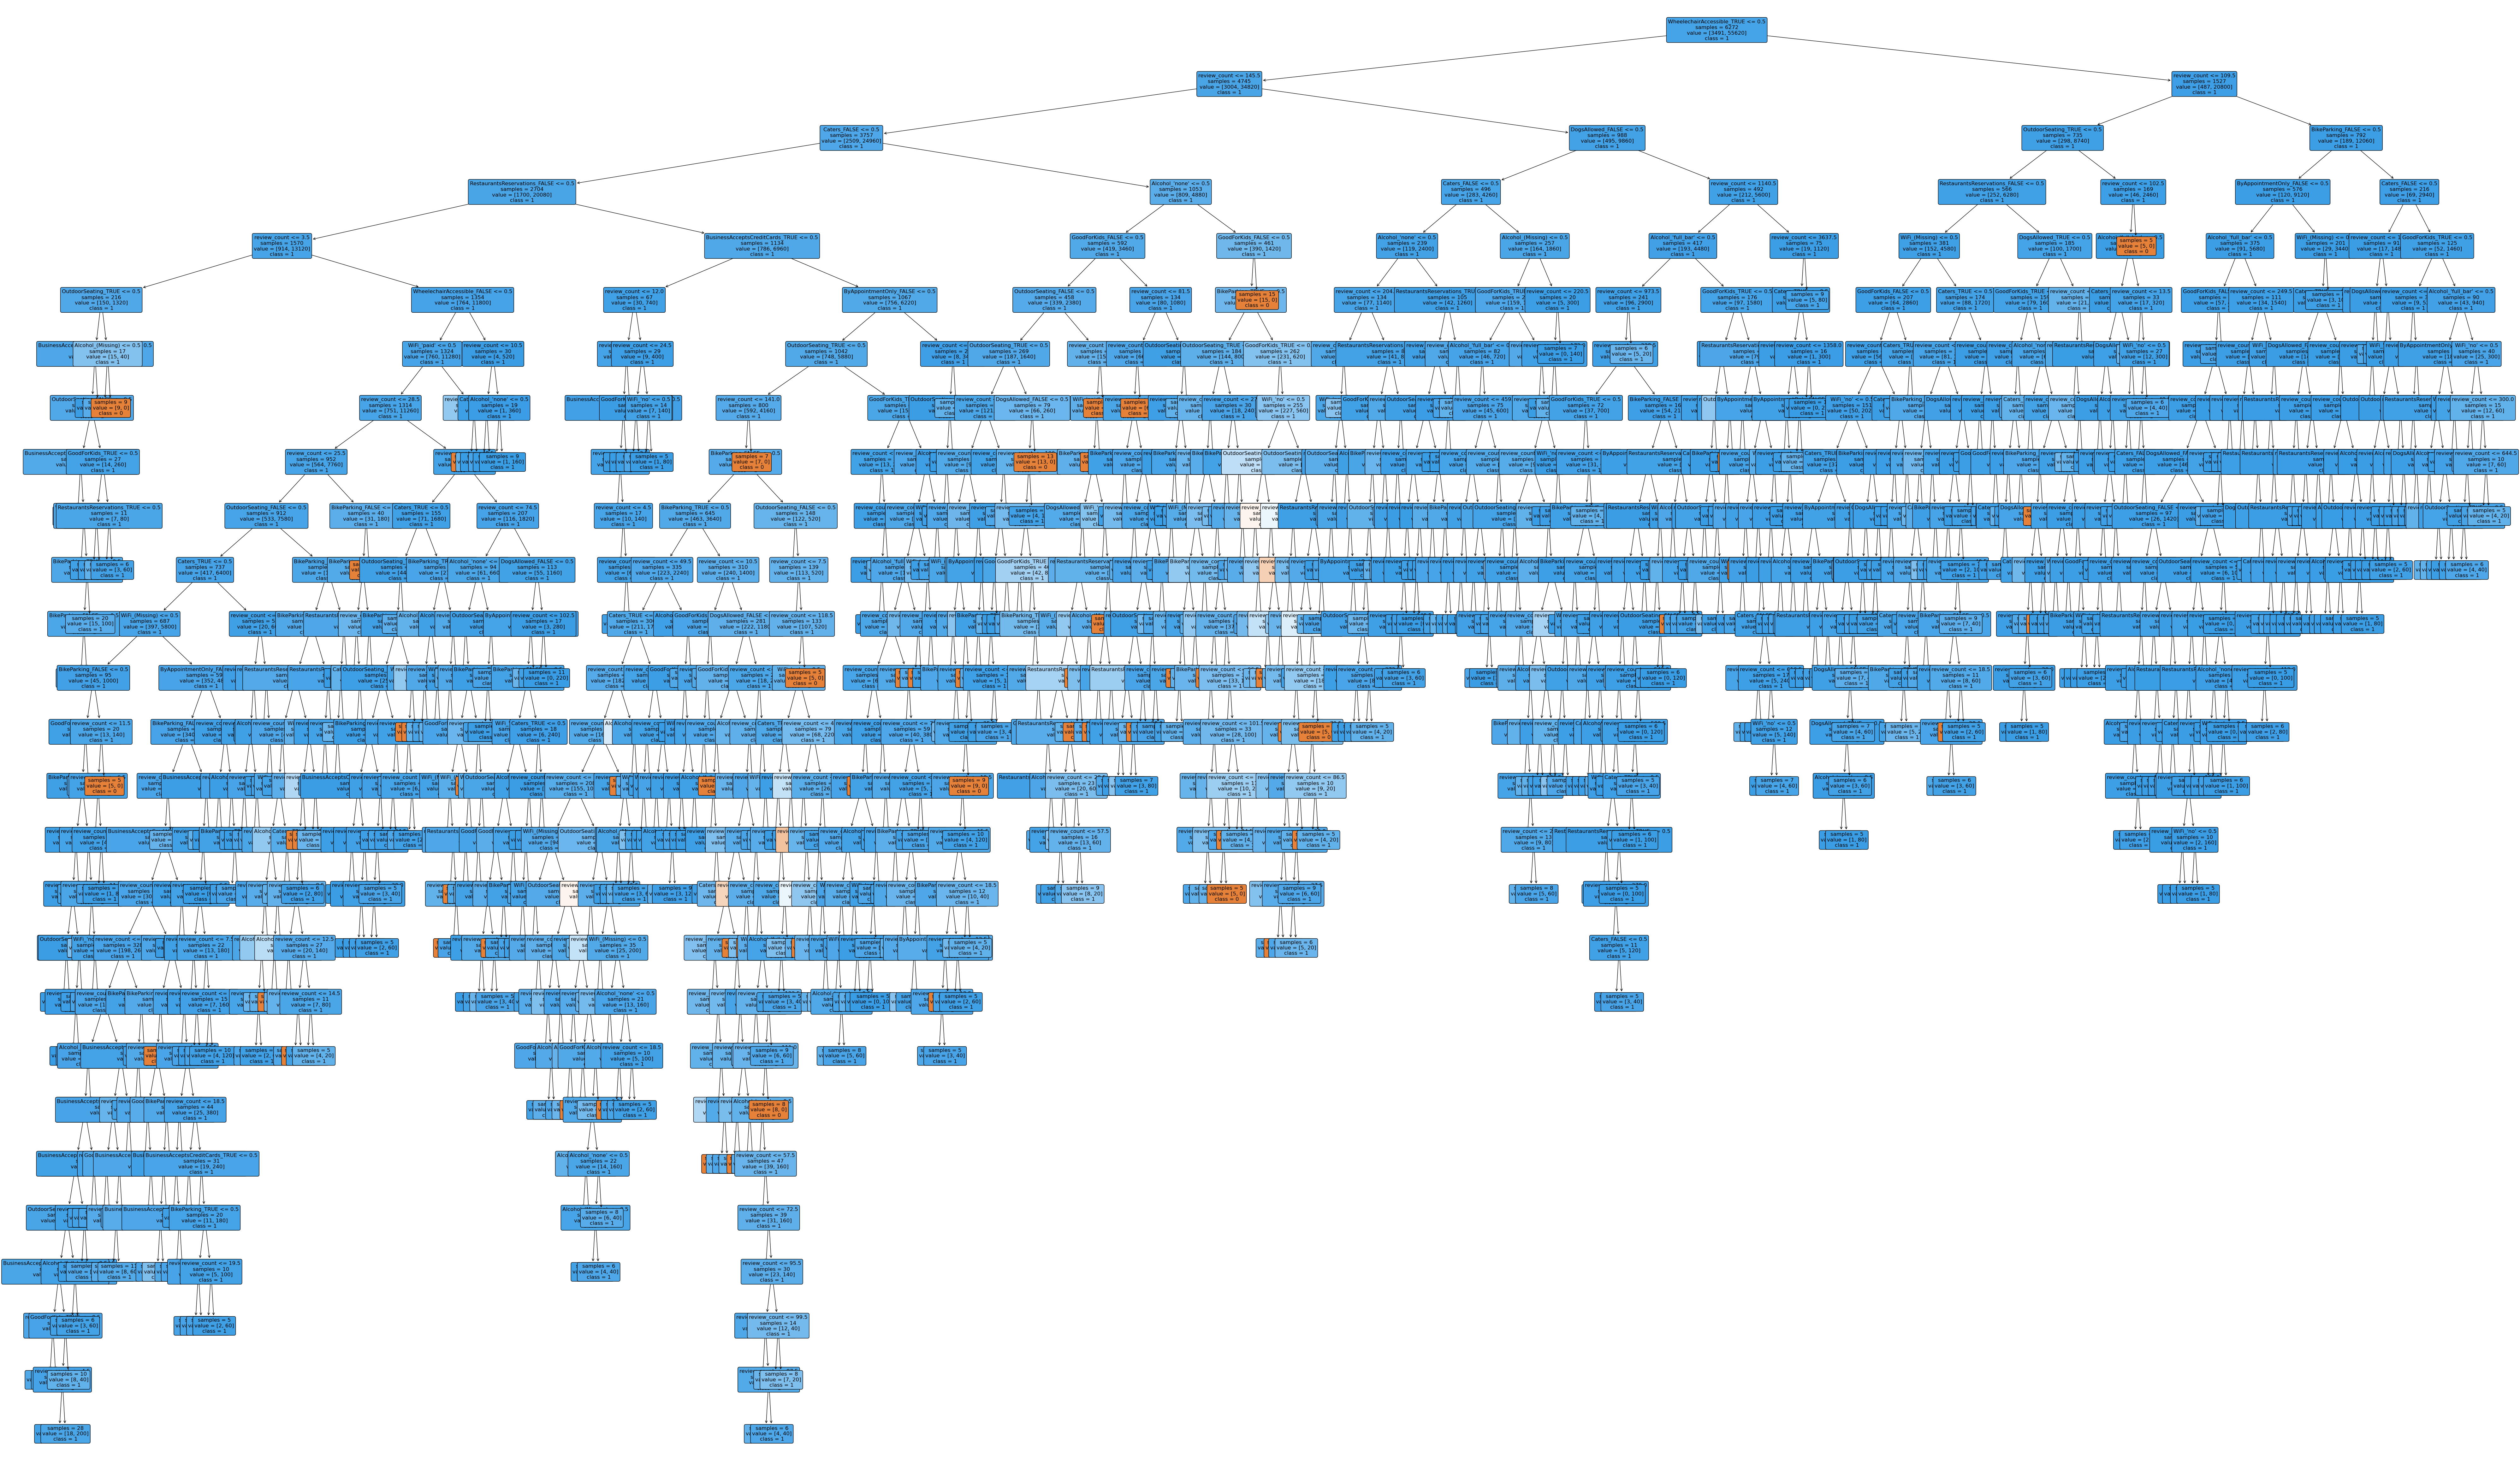

In [64]:
#below is the code for classification tree model
dtc3 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.0,
                              class_weight = {0: 1, 1: 20},
                              random_state = 88)

dtc3 = dtc3.fit(X_train1, y_train1)

print('Node count =', dtc3.tree_.node_count)
plt.figure(figsize=(100,60))
plot_tree(dtc3, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12) 
plt.show()

In [65]:
#(d)（v) compute a baseline model
default_false = np.sum(yelp_train['fourOrAbove'] == 0)  # not default
default_true = np.sum(yelp_train['fourOrAbove'] == 1)   # default

print(pd.Series({'0': default_false, '1': default_true}))

0    3491
1    2781
dtype: int64


In [67]:
#baseline model accuracy on test data
default_false_test = np.sum(yelp_test['fourOrAbove'] == 0)
default_true_test = np.sum(yelp_test['fourOrAbove'] == 1)
ACC_test = default_false_test / (default_false_test + default_true_test)
ACC_test

0.5636160714285714

In [105]:
TPR = 0                        # TPR = TP/P = TP/(TP+FN)
FPR = 0                        # FPR = FP/N = FP/(FP+TN)
print(TPR,FPR)

0 0


In [103]:
y_test1=yelp_test['fourOrAbove']
X_test1=yelp_test.drop(['fourOrAbove','stars'],axis=1)

In [78]:
yelp_enc2 = pd.get_dummies(yelp_test, drop_first=True)
yelp_enc2['fourOrAbove'] = yelp_test['fourOrAbove']
yelp_enc2.head()

stars  review_count  fourOrAbove  GoodForKids_FALSE  GoodForKids_TRUE  \
0    2.5            56            0                  0                 0   
1    4.0           120            1                  0                 1   
2    4.0           269            1                  0                 1   
3    2.5            29            0                  0                 1   
4    3.5           660            0                  0                 1   

   Alcohol_'full_bar'  Alcohol_'none'  Alcohol_(Missing)  \
0                   0               1                  0   
1                   0               1                  0   
2                   0               0                  0   
3                   0               1                  0   
4                   1               0                  0   

   BusinessAcceptsCreditCards_FALSE  BusinessAcceptsCreditCards_TRUE  ...  \
0                                 0                                1  ...   
1                                 0                                1  ...   
2                                 0                                1  ...   
3                                 0                                1  ...   
4                                 0                                1  ...   

   WheelechairAccessible_FALSE  WheelechairAccessible_TRUE  \
0                            0                           0   
1                            0                           1   
2                            0                           0   
3                            0                           0   
4                            0                           1   

   OutdoorSeating_FALSE  OutdoorSeating_TRUE  RestaurantsReservations_FALSE  \
0                     1                    0                              0   
1                     1                    0                              1   
2                     1                    0                              1   
3                     1                    0                              1   
4                     1                    0                              0   

   RestaurantsReservations_TRUE  DogsAllowed_FALSE  DogsAllowed_TRUE  \
0                             0                  0                 0   
1                             0                  1                 0   
2                             0                  0                 0   
3                             0                  0                 0   
4                             1                  1                 0   

   Caters_FALSE  Caters_TRUE  
0             1            0  
1             0            1  
2             1            0  
3             0            0  
4             1            0  

[5 rows x 27 columns]

In [80]:
y_test=yelp_enc2['fourOrAbove']
X_test=yelp_enc2.drop(['fourOrAbove','stars'],axis=1)

In [96]:
#train classification tree model on yelp_test
from sklearn.metrics import confusion_matrix
y_pred_class = dtc3.predict(X_test)

cm_class = confusion_matrix(y_test, y_pred_class)
print ("Confusion Matrix : \n", cm_class) 


acc_class = (cm_class.ravel()[0]+cm_class.ravel()[3])/sum(cm_class.ravel())
TPR_class = cm_class.ravel()[3]/(cm_class.ravel()[3]+cm_class.ravel()[2])
FPR_class = cm_class.ravel()[1]/(cm_class.ravel()[1]+cm_class.ravel()[0])
print('Accuracy for classification tree is: %.4f' % acc_class)
print('TPR for classification tree is: %.4f' % TPR_class)
print('FPR for classification tree is is: %.4f' % FPR_class)

Confusion Matrix : 
 [[ 386 1129]
 [ 132 1041]]
Accuracy for classification tree is: 0.5309
TPR for classification tree is: 0.8875
FPR for classification tree is is: 0.7452


In [121]:
from sklearn.metrics import confusion_matrix
y_prob_regression = dtr1.predict(X_test)
y_pred_regression=[1 if x > 1/2 else 0 for x in y_prob_regression]
cm_regression = confusion_matrix(y_test, y_pred_regression)
print ("Confusion Matrix : \n", cm_regression) 


acc_regression = (cm_regression.ravel()[0]+cm_regression.ravel()[3])/sum(cm_regression.ravel())
TPR_regression = cm_regression.ravel()[3]/(cm_regression.ravel()[3]+cm_regression.ravel()[2])
FPR_regression = cm_regression.ravel()[1]/(cm_regression.ravel()[1]+cm_regression.ravel()[0])
print('Accuracy for regression tree is: %.4f' % acc_regression)
print('TPR for regression tree is: %.4f' % TPR_regression)
print('FPR for regression tree is is: %.4f' % FPR_regression)

Confusion Matrix : 
 [[1223  292]
 [ 612  561]]
Accuracy for regression tree is: 0.6637
TPR for regression tree is: 0.4783
FPR for regression tree is is: 0.1927


In [116]:
#train linear regression on yelp_test
y_prob_linear = model2.predict(X_test1)
y_pred_linear= pd.Series([1 if x > 1/2 else 0 for x in y_prob_linear], index=y_prob_linear.index)
cm_linear = confusion_matrix(y_test1, y_pred_linear)
print ("Confusion Matrix : \n", cm_linear) 


acc_linear = (cm_linear.ravel()[0]+cm_linear.ravel()[3])/sum(cm_linear.ravel())
TPR_linear = cm_linear.ravel()[3]/(cm_linear.ravel()[3]+cm_linear.ravel()[2])
FPR_linear = cm_linear.ravel()[1]/(cm_linear.ravel()[1]+cm_linear.ravel()[0])
print('Accuracy for linear regression model is: %.4f' % acc_linear)
print('TPR for linear regression is: %.4f' % TPR_linear)
print('FPR for linear regression is is: %.4f' % FPR_linear)

Confusion Matrix : 
 [[1258  257]
 [ 599  574]]
Accuracy for linear regression model is: 0.6815
TPR for linear regression is: 0.4893
FPR for linear regression is is: 0.1696


In [117]:
#logistics regression TPR FPR Confusion matrix
y_prob = model3.predict(yelp_test)
y_pred_log = pd.Series([1 if x > 1/2 else 0 for x in y_prob], index=y_prob.index)
cm_log = confusion_matrix(y_test1, y_pred_log)
print ("Confusion Matrix : \n", cm_log) 
acc_log = (cm_log.ravel()[0]+cm_log.ravel()[3])/sum(cm_log.ravel())
TPR_log = cm_log.ravel()[3]/(cm_log.ravel()[3]+cm_log.ravel()[2])
FPR_log = cm_log.ravel()[1]/(cm_log.ravel()[1]+cm_log.ravel()[0])
print('Accuracy for logistics regression is: %.4f' % acc_log)
print('TPR for logistics regression is: %.4f' % TPR_log)
print('FPR for logistics regression is: %.4f' % FPR_log)

Confusion Matrix : 
 [[1254  261]
 [ 601  572]]
Accuracy for logistics regression is: 0.6793
TPR for logistics regression is: 0.4876
FPR for logistics regression is: 0.1723


In [122]:
#Table
models = ['Baseline Model', 'linear regression Model', 'Logistic Regression Model ', 'Classification tree Model', 'Regression tree Model']
accuracies = [0.5636160714285714, 0.6815,  0.6793, 0.5309, 0.6637]  # Replace with your accuracy values
tprs = [0, 0.4893, 0.4876, 0.8875, 0.4783]  # Replace with your TPR values
fprs = [0, 0.1696, 0.1723, 0.7452, 0.1927]  # Replace with your FPR values

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'TPR': tprs,
    'FPR': fprs
})

# Set the model names as the index for better readability
df.set_index('Model', inplace=True)

# Display the DataFrame
print(df)


                            Accuracy     TPR     FPR
Model                                               
Baseline Model              0.563616  0.0000  0.0000
linear regression Model     0.681500  0.4893  0.1696
Logistic Regression Model   0.679300  0.4876  0.1723
Classification tree Model   0.530900  0.8875  0.7452
Regression tree Model       0.663700  0.4783  0.1927


### The results seems resonable. Most the models performs better tgan the baseline model. Since we want a model that peforms better than the baseline model, I would not consider Classification tree model because of its high FPR. The model is too optimistic. To have a fair model, I would recommend a good accuracy and a high TPR with a low FPR in relative. In this case, linear regression model seems the most reliable one to use. The model has a decent chance to predict true postive results and a low chance to predict flase results that are actually true. 

### (e)  I am using the linear regression model and the logistic regression model for advising since they both have decent accuracy and TPR and FPR
1st: Do not let your restaurant not allow researvtions unless you have a huge customer flow everyday. From the two models I ran, not having reseravtion  have a significanlty impact on lower the restaurant's ratings.(significant low p value and negative coeffiecent on both model).
2nd:If your restaurant is planning to let your customers use wifi.Never charge your customer for wifi! From the logistic regression model and linear regression model. charging your customers for wifi will have a signifiacnt negative impact on ratings. You should choose rather not give out wifi or let your customers use it for free. Both will increase the probablility having a higher rating. Thus, if you are on a buget cut, just do not give out wifi for customers for saving money.
3rd:Furthermore, allowing or nor allowing dogs will both increase your chance get a higher rating. I would recommend you allowing for outdoor seatring. From the regression models, i see not allowing outdoor seating is significat effective to resturants lower rating. Why not make outdoor seating and allowing dogs at the same time.You can choose not to allow dogs inside.Then you will have a boost impact on acheving a good rating overall.